In [213]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from  av.io import read
import pandas as pd
import datetime

In [241]:
def read_and_plot(filename, msg="", cuts=None, label=None, plot=False):
    data = read(" ".join(["a:" + str(i) for i in range(4)]), filename, 50)
    datapairs = list(zip(data[0], data[1]))
    
    df = pd.DataFrame()
    names = []
    col_name_tpls = []
    for sensor_data, stream_object in datapairs:
        meta_dict = stream_object.metadata
        print(meta_dict)
        name = meta_dict["NAME"]
        names.append(name)
        n_cols = len(sensor_data)
        col_names = []
        for i in range(n_cols):
            col_name = name + "_" + str(i)
            col_names.append(col_name)
            df[col_name] = pd.Series(sensor_data.T[:,i])
        col_name_tpls.append(col_names)
    df.index = pd.TimedeltaIndex(freq="20ms", start=0.0, periods=len(df))
    df_out_list = []
    if cuts:
        
        for cut in cuts:
            df_i = df[pd.Timedelta(10**9 * cut[0]):pd.Timedelta(10**9 * cut[1])]
            df_out_list.append(df_i)
            df_i["Cywee Accelerometer Sensor_2"].plot()
            plt.show()
    # 3d plots
    for col_name_list in col_name_tpls:
        if not plot:
            break
        if len(col_name_list) == 3:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot3D(*[df[col_name_list].iloc[:,i] for i in range(3)])
            ax.set_title(col_name_list[0][:-2])
            plt.show()
            print("("+ msg + ")")
            

    #2d plots
    for col_name_tpl in col_name_tpls:
        if not plot:
            break
        for col_name in col_name_tpl:
            if "acc" in col_name.lower():
                fig = df[col_name].plot()
                fig.set_title(col_name)
                plt.show()
                print("("+ msg + ")")
    df.to_csv("out.csv", header=False)
    print(len(df))
    
    return df, df_out_list, col_name_tpls

In [238]:
def find_peaks(df, start=0.0, end=None, left=False):
    peaks = []
    if end:
        df = df[pd.Timedelta(10**9 * start):pd.Timedelta(10**9 * end)]
    else:
        df = df[pd.Timedelta(10**9 * start):]

    for i in df.index:
        value = df["Cywee Accelerometer Sensor_2"][i]
        cond = value < -1 if left else value > 7
        if cond:
            new = True
            for peak in peaks:
                if i - pd.Timedelta(10**9) < peak + pd.Timedelta(10**9):
                    new = False
                    break
            if new:
                peaks.append(i)
    cuts = []
    for peak in peaks:
        t = peak.value / 10 ** 9
        cuts.append((t-1, t+1))
    return cuts 

{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.180000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.080000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


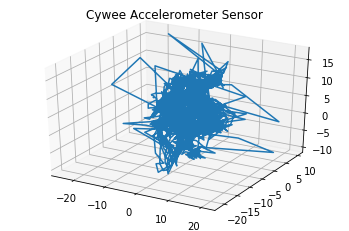

(Swipe RIGHT)


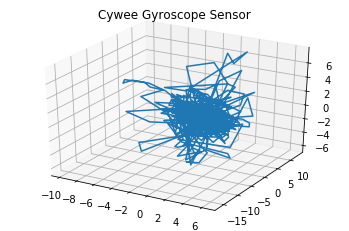

(Swipe RIGHT)


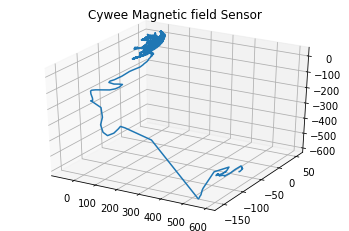

(Swipe RIGHT)


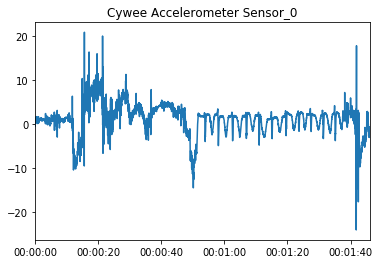

(Swipe RIGHT)


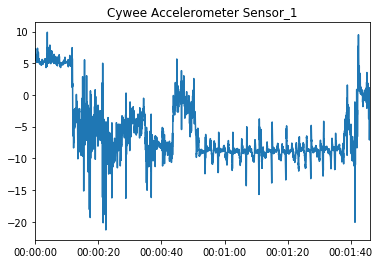

(Swipe RIGHT)


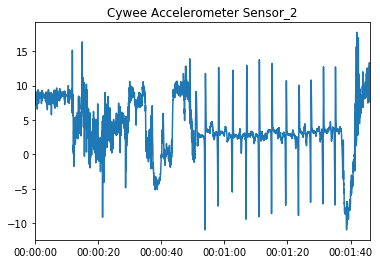

(Swipe RIGHT)
5309
10
{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.180000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.080000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


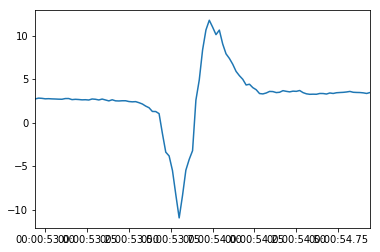

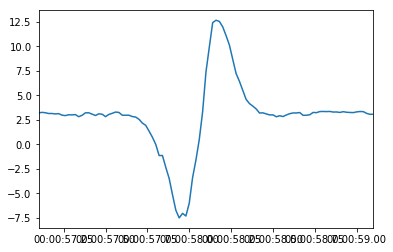

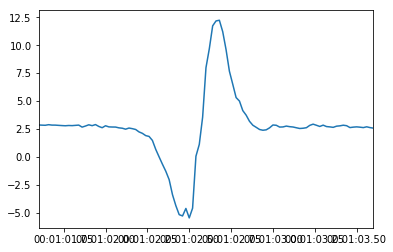

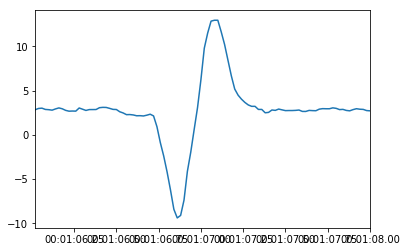

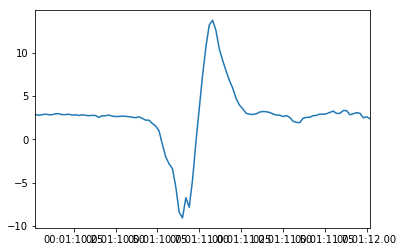

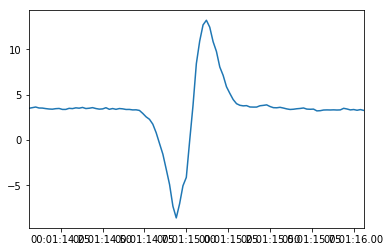

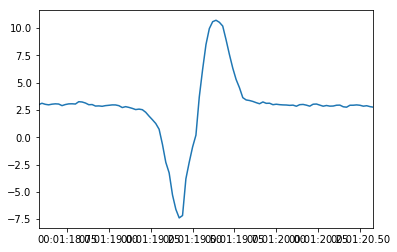

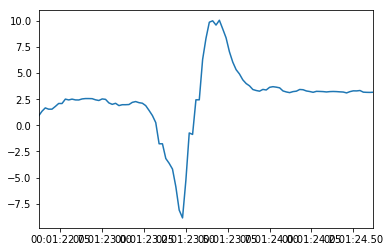

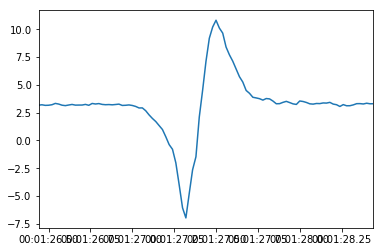

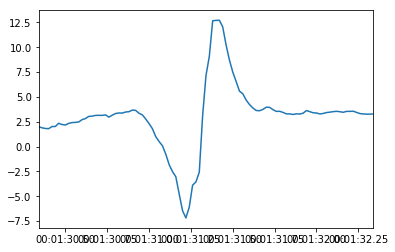

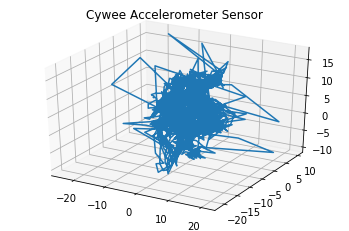

(Swipe RIGHT)


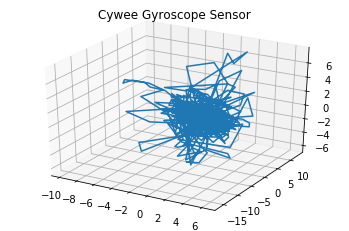

(Swipe RIGHT)


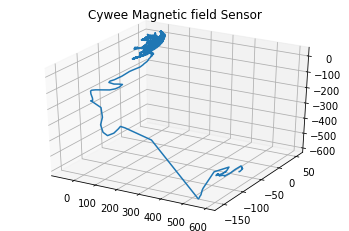

(Swipe RIGHT)


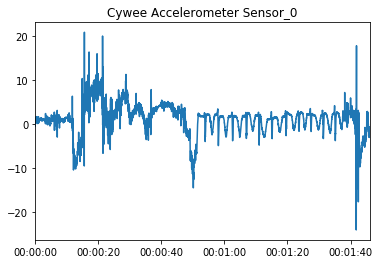

(Swipe RIGHT)


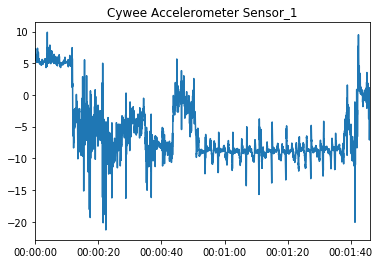

(Swipe RIGHT)


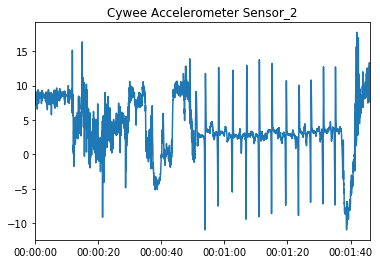

(Swipe RIGHT)
5309


In [240]:
df_swipe_right, df_list, _ = read_and_plot("swipe_right_10_new.mkv", msg="Swipe RIGHT", plot=False)
cuts = find_peaks(df_swipe_right,53,94.6, left=False)
print(len(cuts))
df_swipe_right, df_list, _ = read_and_plot("swipe_right_10_new.mkv", msg="Swipe RIGHT", cuts=cuts)


{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.100000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:06.940000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


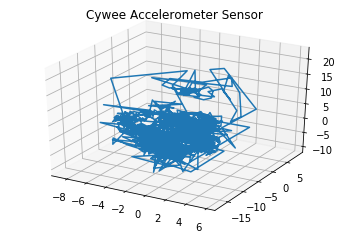

(Swipe RIGHT)


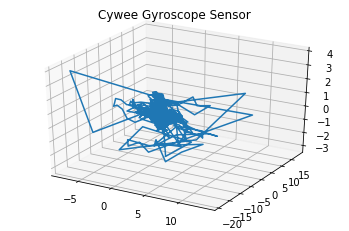

(Swipe RIGHT)


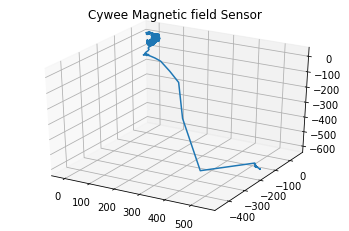

(Swipe RIGHT)


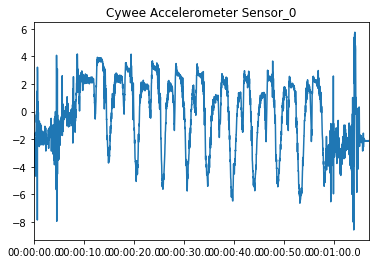

(Swipe RIGHT)


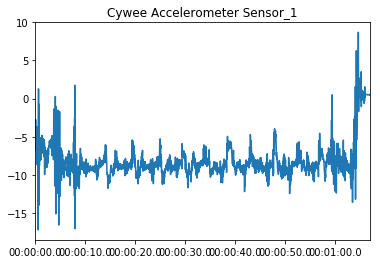

(Swipe RIGHT)


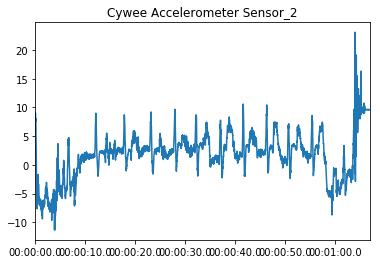

(Swipe RIGHT)
3350
{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.100000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:06.940000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


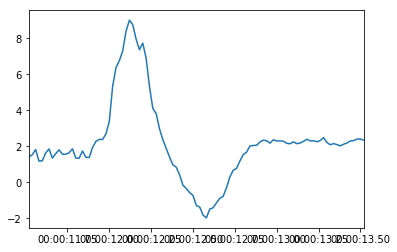

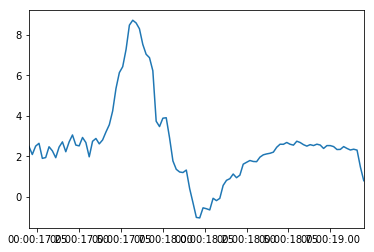

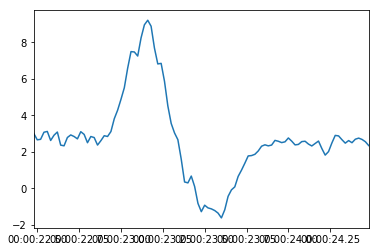

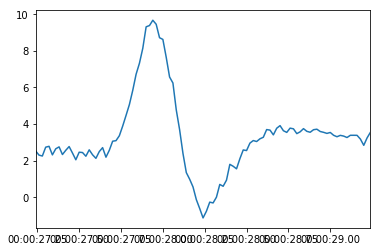

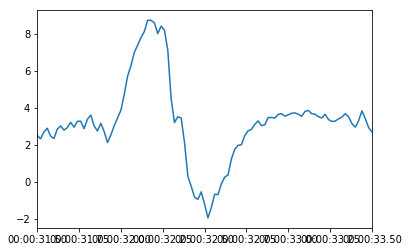

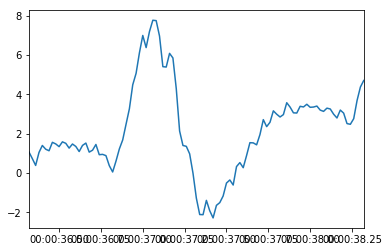

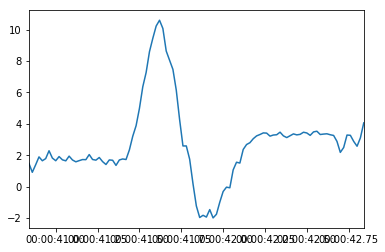

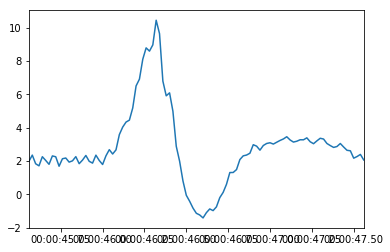

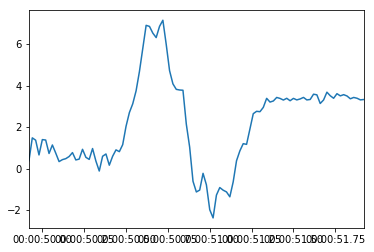

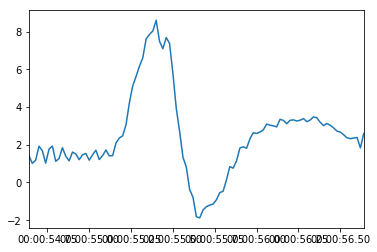

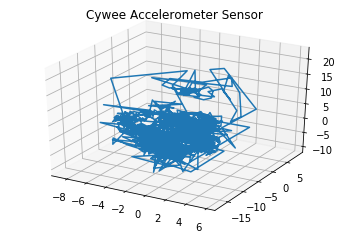

(Swipe RIGHT)


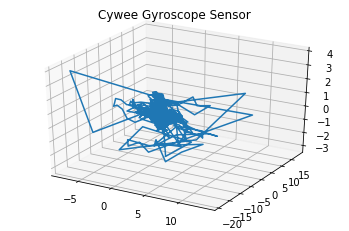

(Swipe RIGHT)


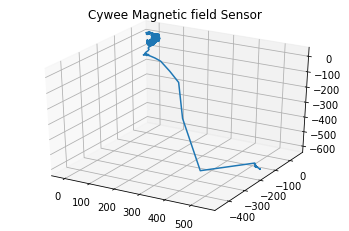

(Swipe RIGHT)


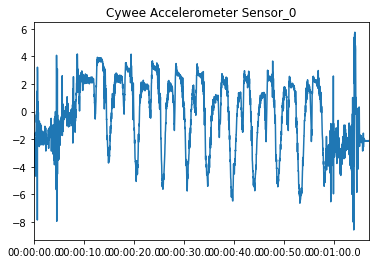

(Swipe RIGHT)


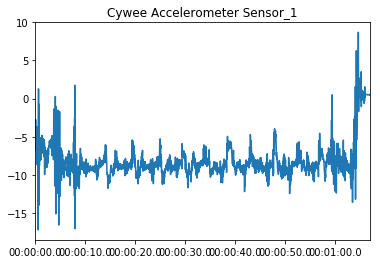

(Swipe RIGHT)


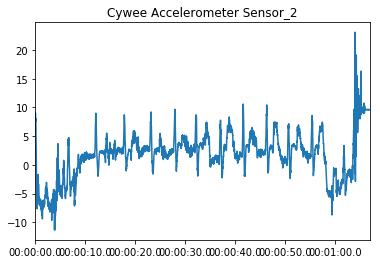

(Swipe RIGHT)
3350
10


In [239]:
df_swipe_right, df_list, _ = read_and_plot("swipe_left_10.mkv", msg="Swipe RIGHT", plot=False)
cuts = find_peaks(df_swipe_right,10,57.6, left=True)
df_swipe_right, df_list, _ = read_and_plot("swipe_left_10.mkv", msg="Swipe RIGHT", cuts=cuts)
print(len(cuts))

In [234]:
df

,Rotation Vector (WAKE_UP)_0,Rotation Vector (WAKE_UP)_1,Rotation Vector (WAKE_UP)_2,Rotation Vector (WAKE_UP)_3,Rotation Vector (WAKE_UP)_4,Cywee Accelerometer Sensor_0,Cywee Accelerometer Sensor_1,Cywee Accelerometer Sensor_2,Cywee Gyroscope Sensor_0,Cywee Gyroscope Sensor_1,Cywee Gyroscope Sensor_2,Cywee Magnetic field Sensor_0,Cywee Magnetic field Sensor_1,Cywee Magnetic field Sensor_2
00:00:00,0.092712,0.105347,0.275635,0.950964,0.0,-1.986328,-3.728516,8.843750,-3.214844,-0.231934,0.259521,23.546875,24.000000,-29.593750
00:00:00.020000,-0.220581,0.119629,0.343994,0.904821,0.0,-3.175781,-4.226562,5.773438,-2.632812,-0.383057,-0.134033,23.546875,25.187500,-24.187500
00:00:00.040000,-0.263428,0.159424,0.284180,0.907982,0.0,-3.447266,-5.609375,9.070312,-1.168945,0.134033,-0.520020,23.203125,25.796875,-25.390625
00:00:00.060000,-0.300781,0.069153,0.405029,0.860639,0.0,-1.567383,-2.750000,7.554688,-1.449219,0.258545,-0.587402,22.687500,27.296875,-25.093750
00:00:00.080000,-0.272705,-0.022751,0.477539,0.834908,0.0,-2.687500,-4.339844,7.539062,-0.003191,0.001063,-1.027344,22.000000,27.000000,-23.296875
00:00:00.100000,-0.284668,-0.028824,0.471680,0.834057,0.0,-3.691406,-6.683594,8.093750,-0.560547,-0.358643,-0.854492,20.078125,28.187500,-24.187500
00:00:00.120000,-0.292480,-0.033630,0.464600,0.835148,0.0,-1.855469,-4.503906,7.152344,-1.288086,0.648926,-0.292480,20.953125,28.187500,-23.890625
00:00:00.140000,-0.291992,-0.039032,0.457031,0.839249,0.0,-3.236328,-3.863281,6.722656,-1.565430,1.063477,-0.259521,20.609375,30.000000,-22.093750
00:00:00.160000,-0.300293,-0.044342,0.451416,0.839096,0.0,-2.982422,-5.566406,5.457031,-1.970703,0.758789,-0.234009,21.296875,30.000000,-20.296875
00:00:00.180000,-0.316650,-0.043732,0.445557,0.836241,0.0,-2.748047,-5.468750,4.757812,-2.898438,1.452148,-0.850098,20.953125,31.187500,-15.500000


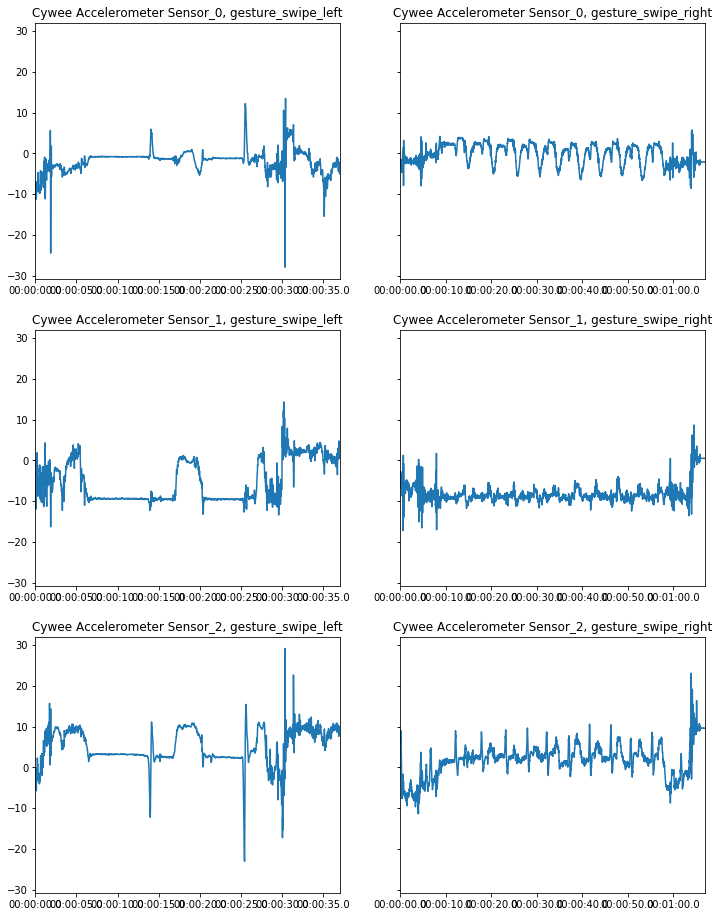

In [219]:
gestures = ["swipe_left", "swipe_right"]

fig, axes = plt.subplots(3,2, sharey=True, figsize=(12, 16))
for col_name_tpl in col_name_tpls:
    for i, col_name in enumerate(col_name_tpl):
        if "acc" in col_name.lower():
            for j,df in enumerate([df_swipe_left, df_swipe_right]):
                df[col_name].plot(ax=axes[i,j])
                axes[i,j].set_title(col_name+ ", gesture_" + gestures[j])

plt.savefig("gesture_acc.pdf")
plt.show()

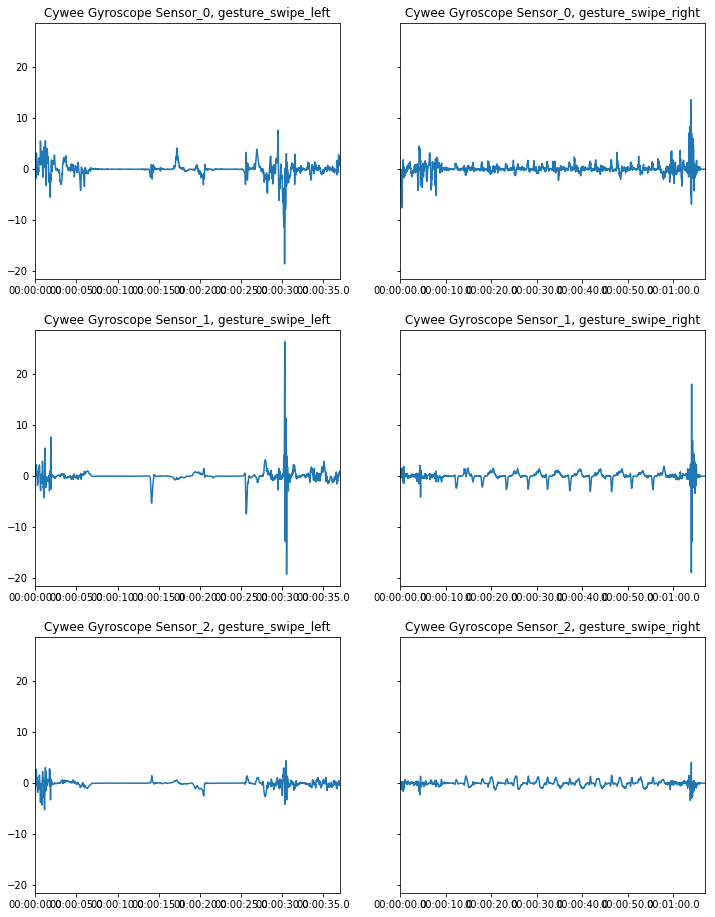

In [220]:
gestures = ["swipe_left", "swipe_right"]

fig, axes = plt.subplots(3,2, sharey=True, figsize=(12, 16))
for col_name_tpl in col_name_tpls:
    for i, col_name in enumerate(col_name_tpl):
        if "gyro" in col_name.lower():
            for j,df in enumerate([df_swipe_left, df_swipe_right]):
                df[col_name].plot(ax=axes[i,j])
                axes[i,j].set_title(col_name+ ", gesture_" + gestures[j])

plt.savefig("gesture_gyro.pdf")
plt.show()


In [221]:
df.shape

(3350, 14)

In [222]:
##col_name_tpls

In [223]:
# plot all in 2D:


In [224]:
df.shape

(3350, 14)

In [225]:
df.index[0]

Timedelta('0 days 00:00:00')

In [226]:
from  seqlearn.hmm import MultinomialHMM as HMM

In [227]:
pd.Timedelta(10**9) # 10 ** 9 is 1 s

# -> ns

Timedelta('0 days 00:00:01')

In [228]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
X, y = sklearn.datasets.load_digits(return_X_y=True)


In [229]:
a = HMM()